In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import pylab
from collections import Counter

## Importing the Dataset

In [3]:
# each row of the dataset corresponds to a different employee

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
len(df)

30

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Check for missing values

In [7]:
df.isnull().sum()

# Conclusion: No missing values

YearsExperience    0
Salary             0
dtype: int64

### Check for outliers - Linear Regression is sensitive to outliers

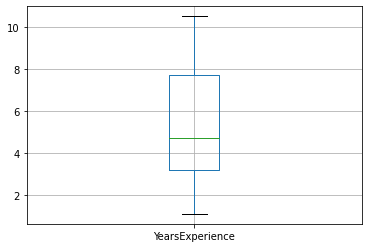

In [8]:
figure = df.boxplot(column="YearsExperience")

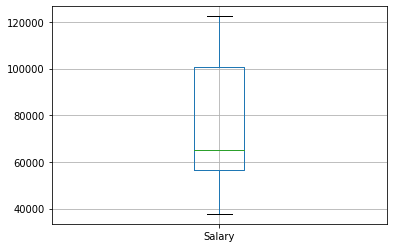

In [9]:
figure = df.boxplot(column="Salary")

# Conclusion: No outliers

## Create matrix of features and label

In [10]:
# X and y are numpy arrays of 2D shape 

X = df.iloc[:,:-1].values # feature
y = df.iloc[:,-1].values # label

# for simple linear regression, X -> one feature only

In [11]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [13]:
X.shape,y.shape

((30, 1), (30,))

## Splitting the dataset into Train and Test Set

In [14]:
from sklearn.model_selection import train_test_split

# Train - 80% data, Test - 20% data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((24, 1), (24,), (6, 1), (6,))

## Training The Simple Linear Regression Model on Train Set

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train model by fit() method. Train set --> train model on existing observations

# fit() method will take X_train and y_train and will compute the parameters theta0 and theta1 
# for h(x) = theta0 + theta1(x) [hypothesis function/regression equation - straight line]

model.fit(X_train,y_train) # training model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate Model - Predicting the Test results

* Check out [Scikit-Learn documentation for evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [17]:
plt.style.use("seaborn")

In [18]:
def evaluate_preds(y_test, y_pred):
  """
  Perform evaluation comparison methods on y_test(true labels) vs y_pred -- for regression problems
  """
  from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

  accuracy = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred) # Gradient Descent
  mae = mean_absolute_error(y_test, y_pred)
  metric_dict = {
      "r2": round(accuracy,2),
      "mse": round(mse,2),
      "mae": round(mae,2)
  }

  print("Regression model metrics on the test set:")
  print(f"Co-efficient of R^2: {accuracy * 100:.2f}%") # accuracy of model
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"Mean absolute Error: {mae:.2f}")

  return metric_dict

In [19]:
# Test set --> evaluate model on new observations (future data)

# 1) Input the features to predict the label(estimated), returns a vector(matrix)
y_pred = model.predict(X_test) 

# 2) Then compare the predicted label with the actual label from the dataset (y_test --> true labels)
evaluation_metrics = evaluate_preds(y_test, y_pred)

Regression model metrics on the test set:
Co-efficient of R^2: 98.82%
Mean Squared Error: 12823412.30
Mean absolute Error: 2446.17


## Visualize Data

### Visualize Train Set

Text(0, 0.5, 'Salary')

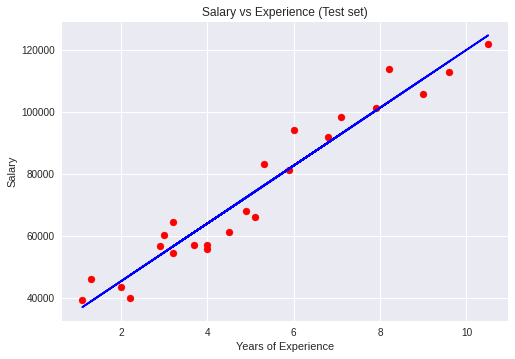

In [20]:
# Plot the train set
plt.scatter(X_train,y_train, color = 'red') # real data

# Plot the regression line (hypothesis function)
y_train_pred = model.predict(X_train) # predict a label for a training sample
plt.plot(X_train,y_train_pred,color='blue') # predicted

plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

### Visualize Test Set

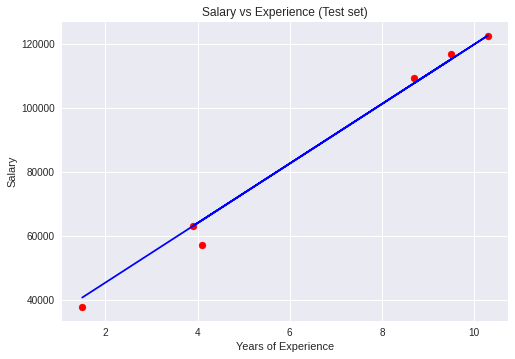

In [21]:
# Plot the test set - new observations
plt.scatter(X_test,y_test, color = 'red')

# Plot the regression line (hypothesis function)
plt.plot(X_test,y_pred,color='blue') 

plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Save Model

In [23]:
from joblib import dump

# Save a model to a file
dump(model,filename='simple_linear_regression.pkl')

['simple_linear_regression.pkl']

## Making a single prediction (for example the salary of an employee with 12 years of experience)

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array.

12→scalar

[12]→1D array

[[12]]→2D array

In [24]:
years = 12
salary = model.predict([[years]])
salary

array([138531.00067138])

## Getting the final linear regression equation with the values of the coefficients

In [28]:
theta1 = model.coef_ # gradient
theta0 = model.intercept_ # y-intercept

26780.09915062818

In [34]:
cols = df.columns
feature = cols[0]
label = cols[1]

In [36]:
print("Hypothesis Equation/Linear Regression Equation")
print(f"{label} = {theta0} + {theta1} * {feature}")

Hypothesis Equation/Linear Regression Equation
Salary = 26780.09915062818 + [9312.57512673] * YearsExperience
